# Prediction Using Supervised ML


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [41]:
data=pd.read_csv('supervised.csv')

In [42]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [43]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Text(0.5, 1.0, 'Scatterplot')

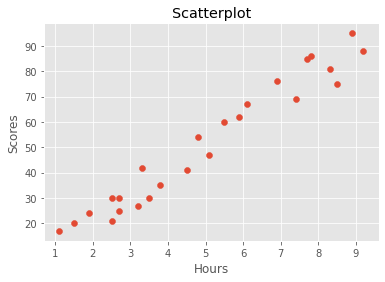

In [59]:
#Let's visualize the relationship by a graph
plt.style.use('ggplot')
plt.scatter(x=data['Hours'],y=data['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scatterplot')


It seems that they have a nice linear relationship.<br>

We can use Linear Regression for this data later.


## Data Preparation


In [45]:
x=data['Hours']
y=data['Scores']

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [56]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
y_pred=lr.predict(x_test.values.reshape(-1,1))


## Evaluation Phase

In [57]:
#Let's evaluate our performance
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print('RMSE Value is ',np.sqrt(mse))


RMSE Value is  6.803472380186844


Here I have used root mean squared error as my error metric. <b> The error value here of 6.80 is almost okay to go further. </b>


In [80]:
y_test.values

array([17, 41, 75, 60, 76])

Let's have a look upon the predicted and actual values 

In [87]:
new_data=pd.concat([pd.Series(np.ndarray.flatten(y_pred.round(2))),pd.Series(y_test.values)],axis=1)
new_data.columns=['Predicted','Actual']
new_data

,Predicted,Actual
0,12.23,17
1,46.47,41
2,86.75,75
3,56.54,60
4,70.64,76


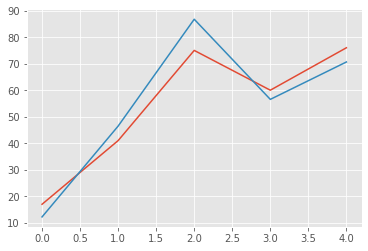

In [100]:
plt.plot(new_data['Actual'])
plt.plot(new_data['Predicted']);
#This almost matches, doesn't it?

## What will be predicted score if a student studies for 9.25 hrs/ day?

In [125]:
#Let's check 
value=np.array(9.25)
prediction=lr.predict(value.reshape(-1,1))
print('The score for the student will be {} provided that he studies 9.25 hrs/day'.format(prediction.flatten()[0].round(2)))

The score for the student will be 94.3 provided that he studies 9.25 hrs/day
